# Fitting to Gamma and Beta distributions
-------

This is a tutorial on fitting to non-normal data. Specifically where data might be heavy-tailed and defined on $(0,\infty)$, where the Gamma distribution would be a suitable choice and where the data is defined on $(0,1)$, where Beta is a suitable choice. Notice that the support for this distributions don't include $0$ and so care must be taken when training to data. The Pydra package will try and check input data before training to ensure they are reasonable values.


In [1]:
%pylab inline
import sys
sys.path.append('../')

Populating the interactive namespace from numpy and matplotlib


## Load pydra library

In [2]:
import importlib
import keras.backend as K
import pydra
import gen_data_utils as gd
import seaborn as sns
import plot_utils as pu
importlib.reload(pydra)
importlib.reload(pu)

Using TensorFlow backend.


<module 'plot_utils' from '../plot_utils.py'>

In [3]:
import tensorflow as tf
import tensorflow.contrib.distributions as dist

# Fitting to a gamma distribution

We begin with a very simple model where the output is a single gamma distribution and a single input variable changes its mean and variance.

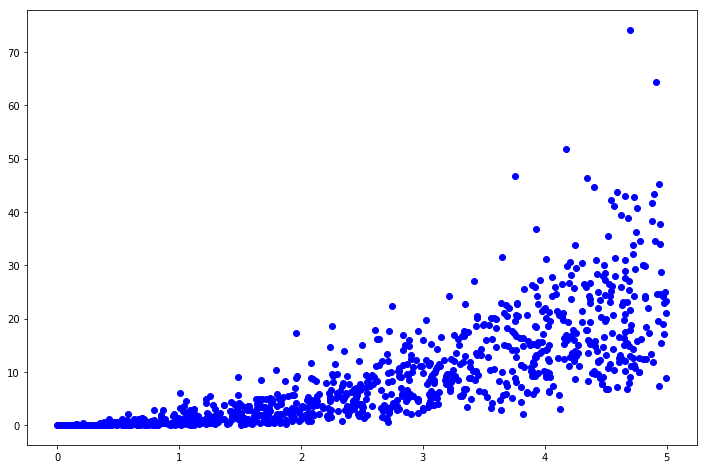

In [4]:
beta = 1.
x = np.random.uniform(low=0,high=5,size=1000);
y = np.random.gamma(x,x/beta) + 1e-10;

plt.figure(figsize=(12,8));
plt.plot(x,y,'bo');

Reshape data for training

In [5]:
x = x.reshape(x.size,1)
y = y.reshape(y.size,1)

Instantiate a pydra model. Notice that we can specify the output distributions using the output_distributions keyword. This provides flexibility for if a multi-dimensional output model has different distributions for different outputs.

In [6]:
model = pydra.Pydra(cluster_size=3,output_size=1,output_distributions=['Gamma'],
                    layers=3,dense_layer_size=64,print_summary=False)
history = model.fit(x, y, epochs=100, batch_size=100,
          verbose=1)

../error_check.py:33: UserWarning: 0.05% of values for output None below 0.001. As using the Gamma distribution for this output, this may lead to nans in training.
  format(np.mean(output<eps),i,eps,distribution)


Epoch 1/100
1000/1000 [==============================] - 0s 204us/step - loss: 5.0006
Epoch 2/100
1000/1000 [==============================] - 0s 55us/step - loss: 3.0953
Epoch 3/100
1000/1000 [==============================] - 0s 51us/step - loss: 2.8312
Epoch 4/100
1000/1000 [==============================] - 0s 52us/step - loss: 2.5865
Epoch 5/100
1000/1000 [==============================] - 0s 49us/step - loss: 2.4115
Epoch 6/100
1000/1000 [==============================] - 0s 46us/step - loss: 2.2895
Epoch 7/100
1000/1000 [==============================] - 0s 47us/step - loss: 2.1784
Epoch 8/100
1000/1000 [==============================] - 0s 48us/step - loss: 2.1010
Epoch 9/100
1000/1000 [==============================] - 0s 50us/step - loss: 2.0161
Epoch 10/100
1000/1000 [==============================] - 0s 52us/step - loss: 1.9541
Epoch 11/100
1000/1000 [==============================] - 0s 48us/step - loss: 1.9153
Epoch 12/100
1000/1000 [==============================] - 0s 5

1000/1000 [==============================] - 0s 63us/step - loss: 1.6546
Epoch 97/100
1000/1000 [==============================] - 0s 55us/step - loss: 1.6548
Epoch 98/100
1000/1000 [==============================] - 0s 51us/step - loss: 1.6535
Epoch 99/100
1000/1000 [==============================] - 0s 46us/step - loss: 1.6506
Epoch 100/100
1000/1000 [==============================] - 0s 49us/step - loss: 1.6527


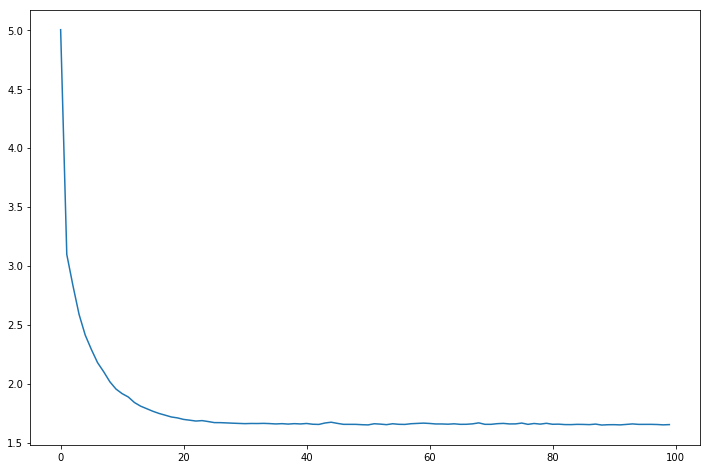

In [7]:
plt.figure(figsize=(12,8));
plt.plot(history.history['loss']);

## compare sample of predictions to original data

In [8]:
x_test = np.linspace(0,5,num=1000);
output = model.predict(x_test)

In [9]:
y_test = pydra.generate_mdn_sample_from_ouput(output, x_test.size,distribution='Gamma')

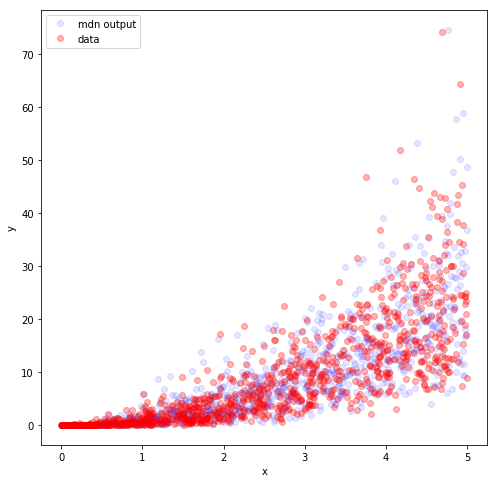

In [10]:
plt.figure(figsize=(8, 8))
plt.plot(x_test,y_test,'bo',alpha=0.1,label='mdn output')
plt.plot(x,y,'ro',alpha=0.3,label='data')
plt.legend();plt.xlabel('x');plt.ylabel('y');

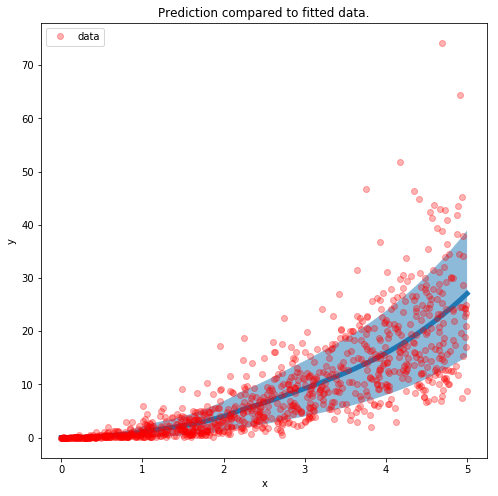

In [12]:
model.predict_plot(x_test)
plt.plot(x,y,'ro',alpha=0.3,label='data')
plt.legend();plt.xlabel('x');plt.ylabel('y');
plt.title('Prediction compared to fitted data.');

# Fit to beta distribution

In this section we instead consider a beta distribution. Once again the model fitting to is straightforward and suitable for testing purposes. 

In [13]:
beta = 1.0
x = np.random.uniform(low=0,high=10,size=1000);
#Need to add a small epsilon to keep data points away from zero.
eps = 1e-10
y = np.random.beta(x,20)+1e-10
y[y<eps] = eps
y[y>1-eps] = eps

x = x.reshape(x.size,1)
y = y.reshape(y.size,1)

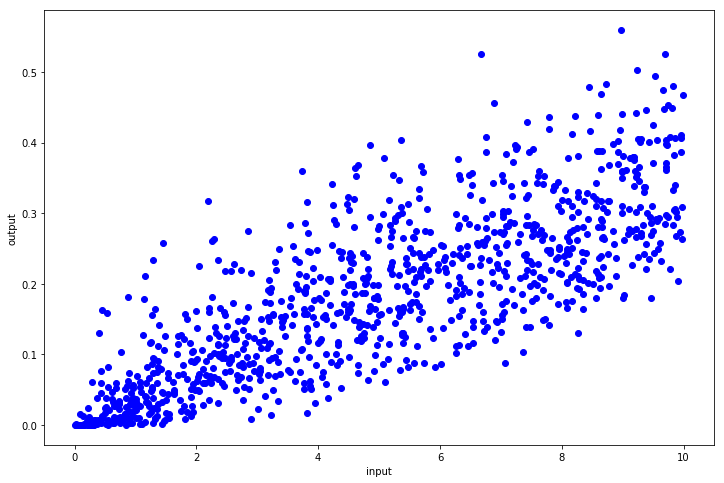

In [14]:
plt.figure(figsize=(12,8));
plt.plot(x,y,'bo');
plt.ylabel('output'); plt.xlabel('input');

In [17]:
model = pydra.Pydra(cluster_size=1,output_size=1,output_distributions=['Beta'],dense_layer_size=64)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 64)           128         input_3[0][0]                    
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 64)           4160        dense_13[0][0]                   
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 64)           4160        dense_14[0][0]                   
__________________________________________________________________________________________________
dense_16 (

In [18]:
history = model.fit(x, y, epochs=100, batch_size=100,
          verbose=1)

../error_check.py:33: UserWarning: 0.025% of values for output None below 0.001. As using the Beta distribution for this output, this may lead to nans in training.
  format(np.mean(output<eps),i,eps,distribution)


Epoch 1/100
1000/1000 [==============================] - 0s 309us/step - loss: -0.0596
Epoch 2/100
1000/1000 [==============================] - 0s 54us/step - loss: -0.4067
Epoch 3/100
1000/1000 [==============================] - 0s 50us/step - loss: -0.6257
Epoch 4/100
1000/1000 [==============================] - 0s 50us/step - loss: -0.7615
Epoch 5/100
1000/1000 [==============================] - 0s 53us/step - loss: -0.8979
Epoch 6/100
1000/1000 [==============================] - 0s 48us/step - loss: -1.0458
Epoch 7/100
1000/1000 [==============================] - 0s 53us/step - loss: -1.1741
Epoch 8/100
1000/1000 [==============================] - 0s 47us/step - loss: -1.2617
Epoch 9/100
1000/1000 [==============================] - 0s 50us/step - loss: -1.2523
Epoch 10/100
1000/1000 [==============================] - 0s 49us/step - loss: -1.3055
Epoch 11/100
1000/1000 [==============================] - 0s 55us/step - loss: -1.3539
Epoch 12/100
1000/1000 [===========================

1000/1000 [==============================] - 0s 55us/step - loss: -1.5860
Epoch 96/100
1000/1000 [==============================] - 0s 57us/step - loss: -1.5849
Epoch 97/100
1000/1000 [==============================] - 0s 56us/step - loss: -1.5661
Epoch 98/100
1000/1000 [==============================] - 0s 55us/step - loss: -1.5782
Epoch 99/100
1000/1000 [==============================] - 0s 53us/step - loss: -1.5668
Epoch 100/100
1000/1000 [==============================] - 0s 59us/step - loss: -1.5786


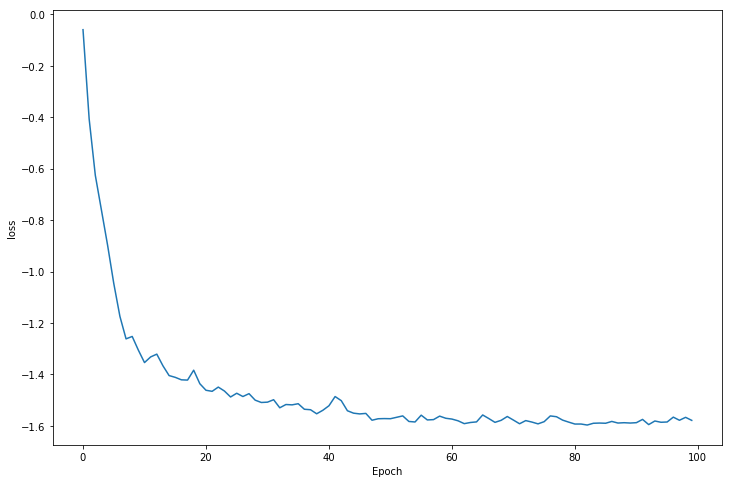

In [20]:
plt.figure(figsize=(12,8));
plt.plot(history.history['loss']);
plt.ylabel('loss');plt.xlabel('Epoch');

## Predict using fitted model

In [21]:
x_test = np.linspace(0,10,num=1000);
output = model.predict(x_test)

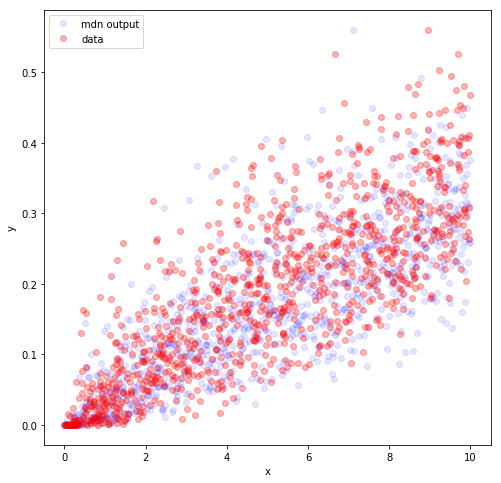

In [22]:
y_test = pydra.generate_mdn_sample_from_ouput(output, x_test.size,distribution='Beta')
plt.figure(figsize=(8, 8))
plt.plot(x_test,y_test,'bo',alpha=0.1,label='mdn output')
plt.plot(x,y,'ro',alpha=0.3,label='data')
plt.legend();plt.xlabel('x');plt.ylabel('y');

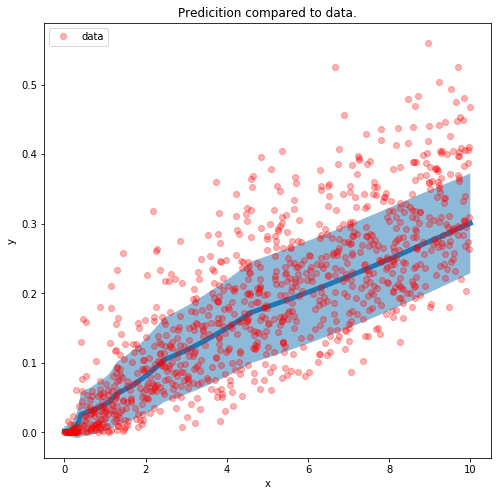

In [24]:
model.predict_plot(x_test)
plt.plot(x,y,'ro',alpha=0.3,label='data')
plt.legend();plt.xlabel('x');plt.ylabel('y');
plt.title('Predicition compared to data.');